# Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def fakedata(s=0, num_of_measurements=1000, sigma=1):
    data = s+sigma*np.random.randn(num_of_measurements)
    return data


In [16]:
d1=fakedata()
d2=fakedata(s=0.1)

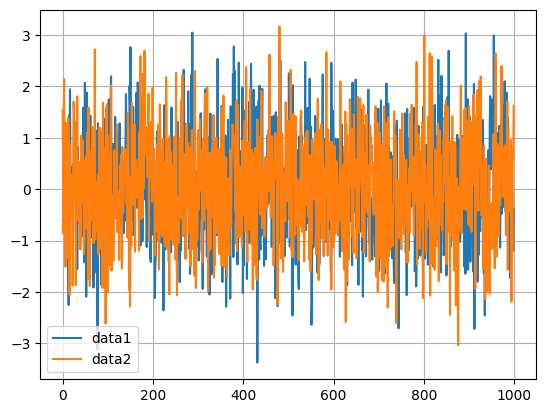

In [17]:
plt.plot(d1, label="data1")
plt.plot(d2, label="data2")
plt.legend(['data1', 'data2'])
plt.grid()
plt.show()

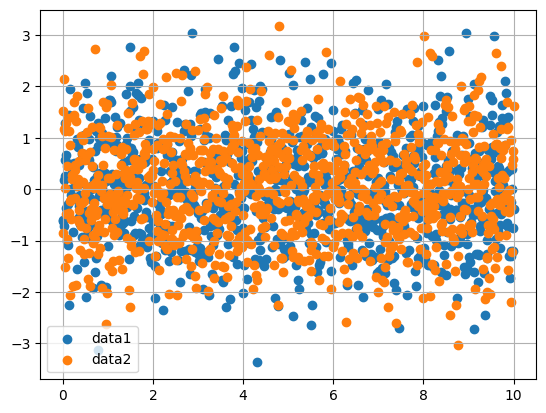

In [18]:
time=np.linspace(0,10,1000)
plt.scatter(time, d1, label="data1")
plt.scatter(time, d2, label="data2")
plt.legend()
plt.grid()
plt.show()

In [21]:
d1.sum()

np.float64(0.4989953335930366)

In [22]:
d2.sum()

np.float64(62.72262049916348)

In [25]:
num_of_sims = 10000
nosig = np.zeros(num_of_sims, dtype=float)
sig = np.zeros(num_of_sims, dtype=float)
for i in range(num_of_sims):
    dno = fakedata()
    dyes = fakedata(s=0.1)
    nosig[i] = dno.sum()
    sig[i] = dyes.sum()

array([  5.22847707,  17.02319813, -27.68965436, ...,  55.10460429,
        -7.82126393,  10.53645579], shape=(10000,))

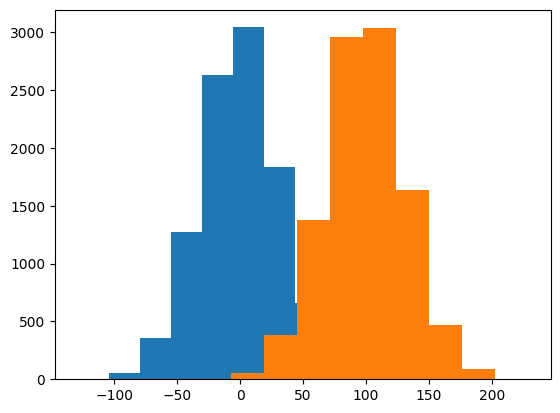

In [26]:
plt.hist(nosig)
plt.hist(sig)
plt.show()

In [29]:
num_of_sims = 10000
nosig = np.zeros(num_of_sims, dtype=float)
sig = np.zeros(num_of_sims, dtype=float)
for i in range(num_of_sims):
    dno = fakedata()
    dyes = fakedata(s=0.1, num_of_measurements=10000)
    nosig[i] = dno.sum()
    sig[i] = dyes.sum()

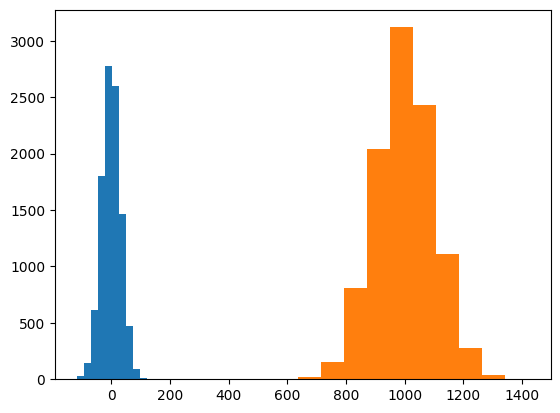

In [30]:
plt.hist(nosig)
plt.hist(sig)
plt.show()

In [31]:
def chisqr(S,data):
    return np.sum((data-S)**2)

In [32]:
slist=np.linspace(-1,1,1000)
chi=np.zeros(len(slist))
for i in range(len(slist)):
    chi[i]=chisqr(slist[i],d2)

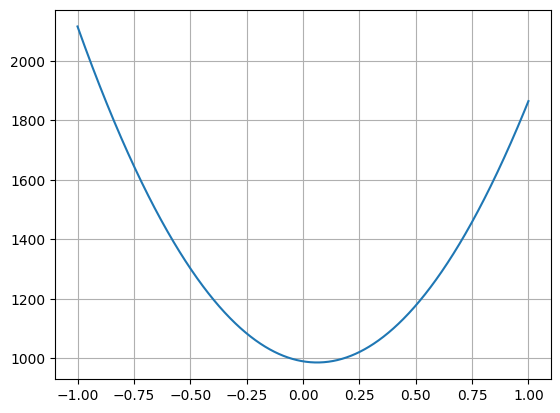

In [33]:
plt.plot(slist, chi)
plt.grid()
plt.show()

In [34]:
from scipy.optimize import minimize

In [36]:
minimize(chisqr,0.5,d2,method='nelder-mead')

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 985.8983907795209
             x: [ 6.270e-02]
           nit: 15
          nfev: 30
 final_simplex: (array([[ 6.270e-02],
                       [ 6.279e-02]]), array([ 9.859e+02,  9.859e+02]))

In [37]:
minimize(chisqr,0.5,d1,method='nelder-mead')

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1034.8213813678008
             x: [ 4.883e-04]
           nit: 16
          nfev: 32
 final_simplex: (array([[ 4.883e-04],
                       [ 5.859e-04]]), array([ 1.035e+03,  1.035e+03]))

np.float64(985.898390545481)

In [52]:
num_of_sims = 1000
nosig = np.zeros(num_of_sims, dtype=float)
sig = np.zeros(num_of_sims, dtype=float)
for i in range(num_of_sims):
    dno = fakedata(num_of_measurements=1000)
    dyes = fakedata(s=0.1, num_of_measurements=1000)
    solno = minimize(chisqr,0.5,dno,method='nelder-mead')['x'][0]
    solyes = minimize(chisqr,0.5,dyes,method='nelder-mead')['x'][0]
    nosig[i] = np.sum(solno)
    sig[i] = np.sum(solyes)

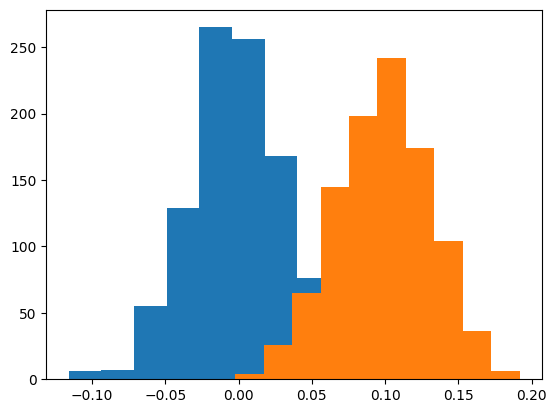

In [53]:
plt.hist(nosig)
plt.hist(sig)
plt.show()

In [54]:
def chisqr_line(x,data):
    return np.sum((data-x[0]*time-x[1])**2)

In [55]:
chisqr_line([0.1,0],d2)

np.float64(1257.7090753800605)

In [56]:
chisqr_line([0,0.1],d2)

np.float64(987.2879930562434)

In [66]:
best_fit = minimize(chisqr_line,[0.2,0.5],d2,method='nelder-mead')
best_fit

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 985.873193515727
             x: [ 1.733e-03  5.407e-02]
           nit: 44
          nfev: 88
 final_simplex: (array([[ 1.733e-03,  5.407e-02],
                       [ 1.750e-03,  5.398e-02],
                       [ 1.745e-03,  5.403e-02]]), array([ 9.859e+02,  9.859e+02,  9.859e+02]))

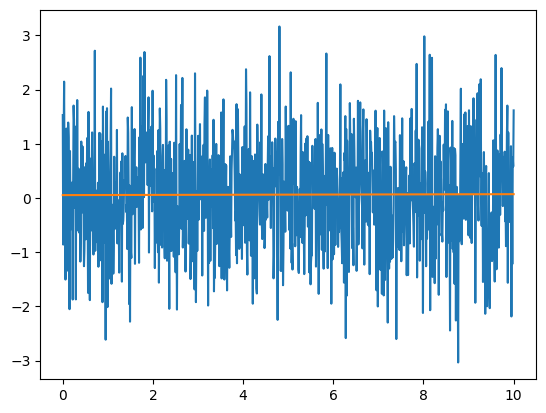

In [63]:
plt.plot(time,d2)
plt.plot(time,time*best_fit['x'][0]+best_fit['x'][1])
plt.show()

In [64]:
from scipy.stats import linregress

In [65]:
linregress(time,d2)

LinregressResult(slope=np.float64(0.0017371151581870132), intercept=np.float64(0.05403704470822841), rvalue=np.float64(0.005055407901327176), pvalue=np.float64(0.8731433129376199), stderr=np.float64(0.010876811115427635), intercept_stderr=np.float64(0.06281301132791735))

In [87]:
def chisqr_poly(x,data):
    out = data
    for i in range(len(x)):
        out = out - x[i]*time**(i)
        print(time)
    return np.sum((out)**2)

In [88]:
chisqr_poly([0,0.1],d2)

[ 0.          0.01001001  0.02002002  0.03003003  0.04004004  0.05005005
  0.06006006  0.07007007  0.08008008  0.09009009  0.1001001   0.11011011
  0.12012012  0.13013013  0.14014014  0.15015015  0.16016016  0.17017017
  0.18018018  0.19019019  0.2002002   0.21021021  0.22022022  0.23023023
  0.24024024  0.25025025  0.26026026  0.27027027  0.28028028  0.29029029
  0.3003003   0.31031031  0.32032032  0.33033033  0.34034034  0.35035035
  0.36036036  0.37037037  0.38038038  0.39039039  0.4004004   0.41041041
  0.42042042  0.43043043  0.44044044  0.45045045  0.46046046  0.47047047
  0.48048048  0.49049049  0.5005005   0.51051051  0.52052052  0.53053053
  0.54054054  0.55055055  0.56056056  0.57057057  0.58058058  0.59059059
  0.6006006   0.61061061  0.62062062  0.63063063  0.64064064  0.65065065
  0.66066066  0.67067067  0.68068068  0.69069069  0.7007007   0.71071071
  0.72072072  0.73073073  0.74074074  0.75075075  0.76076076  0.77077077
  0.78078078  0.79079079  0.8008008   0.81081081  0

np.float64(2602428599.389778)